# Les packages

In [1]:
# outils Python standards
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# étapes de prétraitement
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

# modèles et outils d'apprentissage automatique
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance

# validation croisée et métriques 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as me
from sklearn.metrics import fbeta_score

# Resample
from collections import Counter
from imblearn.over_sampling import SMOTE
#from sklearn.metrics.pairwise import euclidean_distances


import time
start_time = time.time()

pd.options.display.max_rows = 999
import warnings
warnings.filterwarnings('ignore')

# Importation des données

In [2]:
# lecture des données finales pour le modèle train final
TRAIN_FINAL = pd.read_csv('TRAIN_FINAL_DATASET.csv')


#  lecture des données finales pour le modèle test final base client
TEST_FINAL = pd.read_csv("TEST_FINAL_DATASET.csv")

In [3]:
# Dataset final
pd.set_option("display.max_column",89)
TRAIN_FINAL.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AGE,PHONE_CHANGE_YEARS,YEARS_EMPLOYED,EA_RATIO,CI_RATIO,AI_RATIO,CA_RATIO,CG_RATIO,log_INCOME,log_ANNUITY,log_CREDIT,log_GOODS,FLAG_CG_ratio,DAYS_ID_4200,NAME_TYPE_SUITE_Family,...,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,100002,1,1,0,0,1,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,-2120,9.0,1,0,1,2,2,10,0,0,0,0.083037,0.262949,0.139376,0.9722,1,0,26.0,3.0,2.0,0.076923,0.498036,8.198215,16.461104,1.158397,12.218495,10.114579,12.915579,12.768542,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,1,1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,-291,9.0,1,0,1,1,1,11,0,0,0,0.311267,0.622246,0.535276,0.9851,1,0,46.0,2.0,3.0,0.065217,0.208736,7.563343,36.234085,1.145199,12.506177,10.482864,14.072864,13.937286,1,0,1,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,100004,0,0,0,1,1,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,-2531,26.0,1,1,1,2,2,9,0,0,0,0.505998,0.555912,0.729567,0.9816,0,0,52.0,2.0,1.0,0.019231,0.500000,10.000000,20.000000,1.000000,11.119883,8.817298,11.813030,11.813030,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,100006,0,1,1,0,1,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,-2437,9.0,1,0,0,2,2,17,0,0,0,0.505998,0.650442,0.535276,0.9816,1,0,52.0,2.0,8.0,0.153846,0.431748,4.547522,10.532818,1.052803,11.813030,10.298448,12.652944,12.601487,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100007,0,1,0,0,1,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,-3458,9.0,1,0,0,2,2,11,0,1,1,0.505998,0.322738,0.535276,0.9816,0,0,55.0,3.0,8.0,0.145455,0.236842,5.556699,23.461618,1.000000,11.707670,9.992665,13.148031,13.148031,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
TRAIN_FINAL.shape

(305539, 91)

In [5]:
# Dataset final
pd.set_option("display.max_column",89)
TEST_FINAL.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AGE,PHONE_CHANGE_YEARS,YEARS_EMPLOYED,EA_RATIO,CI_RATIO,AI_RATIO,CA_RATIO,CG_RATIO,log_INCOME,log_ANNUITY,log_CREDIT,log_GOODS,FLAG_CG_ratio,DAYS_ID_4200,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,...,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,100001,1,1,0,1,135000.0,568800.0,20560.5,450000.0,0.018850,-5170.0,-812,9.0,1,0,0,2,2,18,0,0,0,0.752614,0.789654,0.159520,0.9732,1,0,53.0,5.0,6.0,0.113208,0.237342,6.565988,27.664697,1.2640,11.813030,9.931127,13.251284,13.017003,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,100005,1,0,0,1,99000.0,222768.0,17370.0,180000.0,0.035792,-9118.0,-1623,9.0,1,0,0,2,2,9,0,0,0,0.564990,0.291656,0.432962,0.9816,1,0,49.0,0.0,12.0,0.244898,0.444409,5.699482,12.824870,1.2376,11.502875,9.762500,12.313886,12.100712,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100028,1,1,0,1,315000.0,1575000.0,49018.5,1575000.0,0.026392,-2000.0,-4208,9.0,1,0,1,2,2,11,0,0,0,0.525734,0.509677,0.612704,0.9970,1,0,38.0,5.0,5.0,0.131579,0.200000,6.426145,32.130726,1.0000,12.660328,10.799953,14.269766,14.269766,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,100038,1,0,1,0,180000.0,625500.0,32067.0,625500.0,0.010032,-4000.0,-4262,16.0,1,1,0,2,2,5,0,1,1,0.202145,0.425687,0.519097,0.9816,1,0,36.0,2.0,6.0,0.166667,0.287770,5.613247,19.506034,1.0000,12.100712,10.375583,13.346307,13.346307,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100042,1,1,1,1,270000.0,959688.0,34600.5,810000.0,0.025164,-6116.0,-2027,10.0,1,0,1,2,2,15,0,0,0,0.506442,0.628904,0.392774,0.9821,0,0,51.0,5.0,33.0,0.647059,0.281341,7.803355,27.736247,1.1848,12.506177,10.451623,13.774364,13.604790,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [6]:
TEST_FINAL.shape

(47801, 90)

# Préparation des données pour la modélisation

In [7]:
# Features
X = TRAIN_FINAL.drop(columns=['TARGET'], axis = 1)

# Variable cible
y = TRAIN_FINAL['TARGET']

In [8]:
y = y.reset_index(drop=True)
X=X.reset_index(drop=True)

In [9]:
X.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AGE,PHONE_CHANGE_YEARS,YEARS_EMPLOYED,EA_RATIO,CI_RATIO,AI_RATIO,CA_RATIO,CG_RATIO,log_INCOME,log_ANNUITY,log_CREDIT,log_GOODS,FLAG_CG_ratio,DAYS_ID_4200,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,...,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,100002,1,0,0,1,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,-2120,9.0,1,0,1,2,2,10,0,0,0,0.083037,0.262949,0.139376,0.9722,1,0,26.0,3.0,2.0,0.076923,0.498036,8.198215,16.461104,1.158397,12.218495,10.114579,12.915579,12.768542,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,1,1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,-291,9.0,1,0,1,1,1,11,0,0,0,0.311267,0.622246,0.535276,0.9851,1,0,46.0,2.0,3.0,0.065217,0.208736,7.563343,36.234085,1.145199,12.506177,10.482864,14.072864,13.937286,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,100004,0,0,1,1,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,-2531,26.0,1,1,1,2,2,9,0,0,0,0.505998,0.555912,0.729567,0.9816,0,0,52.0,2.0,1.0,0.019231,0.500000,10.000000,20.000000,1.000000,11.119883,8.817298,11.813030,11.813030,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,100006,1,1,0,1,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,-2437,9.0,1,0,0,2,2,17,0,0,0,0.505998,0.650442,0.535276,0.9816,1,0,52.0,2.0,8.0,0.153846,0.431748,4.547522,10.532818,1.052803,11.813030,10.298448,12.652944,12.601487,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,100007,1,0,0,1,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,-3458,9.0,1,0,0,2,2,11,0,1,1,0.505998,0.322738,0.535276,0.9816,0,0,55.0,3.0,8.0,0.145455,0.236842,5.556699,23.461618,1.000000,11.707670,9.992665,13.148031,13.148031,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
# alignement des deux tables (par colonne) pour que les deux dataframes aient le même configuration
X, TEST_FINAL = X.align(TEST_FINAL, join = 'inner', axis=1)

In [11]:
TEST_FINAL.shape

(47801, 90)

In [12]:
TEST_FINAL.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AGE,PHONE_CHANGE_YEARS,YEARS_EMPLOYED,EA_RATIO,CI_RATIO,AI_RATIO,CA_RATIO,CG_RATIO,log_INCOME,log_ANNUITY,log_CREDIT,log_GOODS,FLAG_CG_ratio,DAYS_ID_4200,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,...,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,100001,1,1,0,1,135000.0,568800.0,20560.5,450000.0,0.018850,-5170.0,-812,9.0,1,0,0,2,2,18,0,0,0,0.752614,0.789654,0.159520,0.9732,1,0,53.0,5.0,6.0,0.113208,0.237342,6.565988,27.664697,1.2640,11.813030,9.931127,13.251284,13.017003,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,100005,1,0,0,1,99000.0,222768.0,17370.0,180000.0,0.035792,-9118.0,-1623,9.0,1,0,0,2,2,9,0,0,0,0.564990,0.291656,0.432962,0.9816,1,0,49.0,0.0,12.0,0.244898,0.444409,5.699482,12.824870,1.2376,11.502875,9.762500,12.313886,12.100712,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100028,1,1,0,1,315000.0,1575000.0,49018.5,1575000.0,0.026392,-2000.0,-4208,9.0,1,0,1,2,2,11,0,0,0,0.525734,0.509677,0.612704,0.9970,1,0,38.0,5.0,5.0,0.131579,0.200000,6.426145,32.130726,1.0000,12.660328,10.799953,14.269766,14.269766,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,100038,1,0,1,0,180000.0,625500.0,32067.0,625500.0,0.010032,-4000.0,-4262,16.0,1,1,0,2,2,5,0,1,1,0.202145,0.425687,0.519097,0.9816,1,0,36.0,2.0,6.0,0.166667,0.287770,5.613247,19.506034,1.0000,12.100712,10.375583,13.346307,13.346307,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100042,1,1,1,1,270000.0,959688.0,34600.5,810000.0,0.025164,-6116.0,-2027,10.0,1,0,1,2,2,15,0,0,0,0.506442,0.628904,0.392774,0.9821,0,0,51.0,5.0,33.0,0.647059,0.281341,7.803355,27.736247,1.1848,12.506177,10.451623,13.774364,13.604790,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
X.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'AGE', 'PHONE_CHANGE_YEARS',
       'YEARS_EMPLOYED', 'EA_RATIO', 'CI_RATIO', 'AI_RATIO', 'CA_RATIO',
       'CG_RATIO', 'log_INCOME', 'log_ANNUITY', 'log_CREDIT', 'log_GOODS',
       'FLAG_CG_ratio', 'DAYS_ID_4200', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse

In [14]:
TEST_FINAL.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'AGE', 'PHONE_CHANGE_YEARS',
       'YEARS_EMPLOYED', 'EA_RATIO', 'CI_RATIO', 'AI_RATIO', 'CA_RATIO',
       'CG_RATIO', 'log_INCOME', 'log_ANNUITY', 'log_CREDIT', 'log_GOODS',
       'FLAG_CG_ratio', 'DAYS_ID_4200', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse

In [15]:
# Colonnes présentes dans X et absentes dans TEST_FINAL
[c for c in X.columns.to_list() if c not in TEST_FINAL.columns.to_list()]

[]

In [16]:
# Colonnes présentes dans TEST_FINAL et absentes dans X
[c for c in TEST_FINAL.columns.to_list() if c not in X.columns.to_list()]

[]

In [17]:
# Sauvegarde la base client
TEST_FINAL.to_csv('Base_Client.csv')

In [18]:
#on prend X et on enléve l'identifiant des clients
X=X.drop(columns='SK_ID_CURR') 

In [19]:
# Données d'entrainement et de test
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state= seed)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (213877, 89)
X_test shape: (91662, 89)
y_train shape: (213877,)
y_test shape: (91662,)


In [20]:
y_train.value_counts(normalize=True)

0    0.919154
1    0.080846
Name: TARGET, dtype: float64

In [21]:
# Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [22]:
# Stocker les résulats dans un dataframe
#pd.set_option('display.max_colwidth', None)             
#results = pd.DataFrame(columns = ['Model Type','AUC - Score', 'AUC - Test', 'Hyperparameters'])

# Modélisation

## Création d'un modèle de base

In [23]:
# Instanciation du modèle
clf_dummy = DummyClassifier(strategy="most_frequent")

#entrainement
clf_dummy.fit(X_train, y_train) 

# Prediction
y_pred = clf_dummy.predict(X_test)

#### Evaluation des performances du modèle de base

Il existe plusieurs métriques permettant d'évaluer cette performance. Le choix de la métrique doit être en fonction du problème business qu'on veut résoudre.
Commençons d'abord par calculer la précision globale du modèle de forêts aléatoires

In [24]:
# Précision globale du modèle
print("Le score sur les données d'entraînement est :", clf_dummy.score(X_train, y_train))
print("Le score sur les données d'évaluation est :", clf_dummy.score(X_test, y_test))

Le score sur les données d'entraînement est : 0.9191544672872726
Le score sur les données d'évaluation est : 0.9191595208483341


Ces valeurs nous indiquent que pratiquement 100% des statuts de prêts ont été correctement 
prédits au niveau des données d'entraînement et qu'environ 93% des statuts de prêts ont été 
correctement prédits au niveau des données de test. Cet écart entre score d'entraînement et score 
de test indique qu'il y a peut-être un problème de surapprentissage (overfiting).

Une autre fonction utilisée pour évaluer les modèles de classification est la fonction 
classification_report(). Cette fonction permet de générer d'un seul coup plusieurs métriques.

In [25]:
# Evaluation sur les données test
print("Accuray score: ", accuracy_score(y_test, y_pred))

Accuray score:  0.9191595208483341


In [26]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84252
           1       0.00      0.00      0.00      7410

    accuracy                           0.92     91662
   macro avg       0.46      0.50      0.48     91662
weighted avg       0.84      0.92      0.88     91662



<AxesSubplot:>

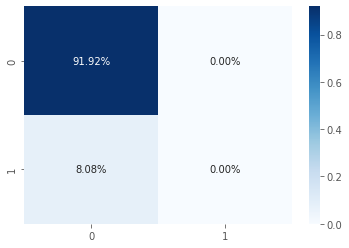

In [27]:
#cmap='Blues'
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='Blues',
            fmt='.2%')

-------------------------------------------------------

# 2. Boruta Features Eliminations

In [28]:
from sklearn.ensemble import RandomForestClassifier
# Defines the estimator used by the Boruta Algo
estimator=RandomForestClassifier()

In [29]:
#from boruta import BorutaPy
#boruta=BorutaPy(estimator=estimator, n_estimators='auto', max_iter=100)
#boruta.fit(np.array(X_train_sm), np.array(y_train_sm))

In [30]:
rf_all_features = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5, verbose=2)
rf_all_features.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.1min finished


RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1,
                       verbose=2)

In [31]:
accuracy_score(y_test, rf_all_features.predict(X_test)) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.1s finished


0.9191595208483341

In [32]:
#from boruta import BorutaPy
#rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5, n_jobs=1, class_weight='balanced')
#boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
#boruta_selector.fit(np.array(X_train), np.array(y_train))  

###### Creating a BorutaPy object with RandomForestClassifier as the estimator and ranking the features.

In [33]:
%%time
from boruta import BorutaPy
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5, verbose=2)
boruta_selector = BorutaPy(rfc, n_estimators='auto', random_state=1)
boruta_selector.fit(X_train.values, y_train.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 191


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 191
building tree 3 of 191
building tree 4 of 191
building tree 5 of 191
building tree 6 of 191
building tree 7 of 191
building tree 8 of 191
building tree 9 of 191
building tree 10 of 191
building tree 11 of 191
building tree 12 of 191
building tree 13 of 191
building tree 14 of 191
building tree 15 of 191
building tree 16 of 191
building tree 17 of 191
building tree 18 of 191
building tree 19 of 191
building tree 20 of 191
building tree 21 of 191
building tree 22 of 191
building tree 23 of 191
building tree 24 of 191
building tree 25 of 191
building tree 26 of 191
building tree 27 of 191
building tree 28 of 191
building tree 29 of 191
building tree 30 of 191
building tree 31 of 191
building tree 32 of 191
building tree 33 of 191
building tree 34 of 191
building tree 35 of 191
building tree 36 of 191
building tree 37 of 191
building tree 38 of 191
building tree 39 of 191
building tree 40 of 191
building tree 41 of 191
building tree 42 of 191
building tree 43 of 191


[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:   56.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 191


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 191
building tree 3 of 191
building tree 4 of 191
building tree 5 of 191
building tree 6 of 191
building tree 7 of 191
building tree 8 of 191
building tree 9 of 191
building tree 10 of 191
building tree 11 of 191
building tree 12 of 191
building tree 13 of 191
building tree 14 of 191
building tree 15 of 191
building tree 16 of 191
building tree 17 of 191
building tree 18 of 191
building tree 19 of 191
building tree 20 of 191
building tree 21 of 191
building tree 22 of 191
building tree 23 of 191
building tree 24 of 191
building tree 25 of 191
building tree 26 of 191
building tree 27 of 191
building tree 28 of 191
building tree 29 of 191
building tree 30 of 191
building tree 31 of 191
building tree 32 of 191
building tree 33 of 191
building tree 34 of 191
building tree 35 of 191
building tree 36 of 191
building tree 37 of 191
building tree 38 of 191
building tree 39 of 191
building tree 40 of 191
building tree 41 of 191
building tree 42 of 191
building tree 43 of 191


[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:   58.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 191


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 191
building tree 3 of 191
building tree 4 of 191
building tree 5 of 191
building tree 6 of 191
building tree 7 of 191
building tree 8 of 191
building tree 9 of 191
building tree 10 of 191
building tree 11 of 191
building tree 12 of 191
building tree 13 of 191
building tree 14 of 191
building tree 15 of 191
building tree 16 of 191
building tree 17 of 191
building tree 18 of 191
building tree 19 of 191
building tree 20 of 191
building tree 21 of 191
building tree 22 of 191
building tree 23 of 191
building tree 24 of 191
building tree 25 of 191
building tree 26 of 191
building tree 27 of 191
building tree 28 of 191
building tree 29 of 191
building tree 30 of 191
building tree 31 of 191
building tree 32 of 191
building tree 33 of 191
building tree 34 of 191
building tree 35 of 191
building tree 36 of 191
building tree 37 of 191
building tree 38 of 191
building tree 39 of 191
building tree 40 of 191
building tree 41 of 191
building tree 42 of 191
building tree 43 of 191


[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:   55.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 191


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 191
building tree 3 of 191
building tree 4 of 191
building tree 5 of 191
building tree 6 of 191
building tree 7 of 191
building tree 8 of 191
building tree 9 of 191
building tree 10 of 191
building tree 11 of 191
building tree 12 of 191
building tree 13 of 191
building tree 14 of 191
building tree 15 of 191
building tree 16 of 191
building tree 17 of 191
building tree 18 of 191
building tree 19 of 191
building tree 20 of 191
building tree 21 of 191
building tree 22 of 191
building tree 23 of 191
building tree 24 of 191
building tree 25 of 191
building tree 26 of 191
building tree 27 of 191
building tree 28 of 191
building tree 29 of 191
building tree 30 of 191
building tree 31 of 191
building tree 32 of 191
building tree 33 of 191
building tree 34 of 191
building tree 35 of 191
building tree 36 of 191
building tree 37 of 191
building tree 38 of 191
building tree 39 of 191
building tree 40 of 191
building tree 41 of 191
building tree 42 of 191
building tree 43 of 191


[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:   55.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 191


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 191
building tree 3 of 191
building tree 4 of 191
building tree 5 of 191
building tree 6 of 191
building tree 7 of 191
building tree 8 of 191
building tree 9 of 191
building tree 10 of 191
building tree 11 of 191
building tree 12 of 191
building tree 13 of 191
building tree 14 of 191
building tree 15 of 191
building tree 16 of 191
building tree 17 of 191
building tree 18 of 191
building tree 19 of 191
building tree 20 of 191
building tree 21 of 191
building tree 22 of 191
building tree 23 of 191
building tree 24 of 191
building tree 25 of 191
building tree 26 of 191
building tree 27 of 191
building tree 28 of 191
building tree 29 of 191
building tree 30 of 191
building tree 31 of 191
building tree 32 of 191
building tree 33 of 191
building tree 34 of 191
building tree 35 of 191
building tree 36 of 191
building tree 37 of 191
building tree 38 of 191
building tree 39 of 191
building tree 40 of 191
building tree 41 of 191
building tree 42 of 191
building tree 43 of 191


[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:   56.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 187


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 187
building tree 3 of 187
building tree 4 of 187
building tree 5 of 187
building tree 6 of 187
building tree 7 of 187
building tree 8 of 187
building tree 9 of 187
building tree 10 of 187
building tree 11 of 187
building tree 12 of 187
building tree 13 of 187
building tree 14 of 187
building tree 15 of 187
building tree 16 of 187
building tree 17 of 187
building tree 18 of 187
building tree 19 of 187
building tree 20 of 187
building tree 21 of 187
building tree 22 of 187
building tree 23 of 187
building tree 24 of 187
building tree 25 of 187
building tree 26 of 187
building tree 27 of 187
building tree 28 of 187
building tree 29 of 187
building tree 30 of 187
building tree 31 of 187
building tree 32 of 187
building tree 33 of 187
building tree 34 of 187
building tree 35 of 187
building tree 36 of 187
building tree 37 of 187
building tree 38 of 187
building tree 39 of 187
building tree 40 of 187
building tree 41 of 187
building tree 42 of 187
building tree 43 of 187


[Parallel(n_jobs=1)]: Done 187 out of 187 | elapsed:   55.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 187


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 187
building tree 3 of 187
building tree 4 of 187
building tree 5 of 187
building tree 6 of 187
building tree 7 of 187
building tree 8 of 187
building tree 9 of 187
building tree 10 of 187
building tree 11 of 187
building tree 12 of 187
building tree 13 of 187
building tree 14 of 187
building tree 15 of 187
building tree 16 of 187
building tree 17 of 187
building tree 18 of 187
building tree 19 of 187
building tree 20 of 187
building tree 21 of 187
building tree 22 of 187
building tree 23 of 187
building tree 24 of 187
building tree 25 of 187
building tree 26 of 187
building tree 27 of 187
building tree 28 of 187
building tree 29 of 187
building tree 30 of 187
building tree 31 of 187
building tree 32 of 187
building tree 33 of 187
building tree 34 of 187
building tree 35 of 187
building tree 36 of 187
building tree 37 of 187
building tree 38 of 187
building tree 39 of 187
building tree 40 of 187
building tree 41 of 187
building tree 42 of 187
building tree 43 of 187


[Parallel(n_jobs=1)]: Done 187 out of 187 | elapsed:   56.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 187


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 187
building tree 3 of 187
building tree 4 of 187
building tree 5 of 187
building tree 6 of 187
building tree 7 of 187
building tree 8 of 187
building tree 9 of 187
building tree 10 of 187
building tree 11 of 187
building tree 12 of 187
building tree 13 of 187
building tree 14 of 187
building tree 15 of 187
building tree 16 of 187
building tree 17 of 187
building tree 18 of 187
building tree 19 of 187
building tree 20 of 187
building tree 21 of 187
building tree 22 of 187
building tree 23 of 187
building tree 24 of 187
building tree 25 of 187
building tree 26 of 187
building tree 27 of 187
building tree 28 of 187
building tree 29 of 187
building tree 30 of 187
building tree 31 of 187
building tree 32 of 187
building tree 33 of 187
building tree 34 of 187
building tree 35 of 187
building tree 36 of 187
building tree 37 of 187
building tree 38 of 187
building tree 39 of 187
building tree 40 of 187
building tree 41 of 187
building tree 42 of 187
building tree 43 of 187


[Parallel(n_jobs=1)]: Done 187 out of 187 | elapsed:   58.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 183


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 183
building tree 3 of 183
building tree 4 of 183
building tree 5 of 183
building tree 6 of 183
building tree 7 of 183
building tree 8 of 183
building tree 9 of 183
building tree 10 of 183
building tree 11 of 183
building tree 12 of 183
building tree 13 of 183
building tree 14 of 183
building tree 15 of 183
building tree 16 of 183
building tree 17 of 183
building tree 18 of 183
building tree 19 of 183
building tree 20 of 183
building tree 21 of 183
building tree 22 of 183
building tree 23 of 183
building tree 24 of 183
building tree 25 of 183
building tree 26 of 183
building tree 27 of 183
building tree 28 of 183
building tree 29 of 183
building tree 30 of 183
building tree 31 of 183
building tree 32 of 183
building tree 33 of 183
building tree 34 of 183
building tree 35 of 183
building tree 36 of 183
building tree 37 of 183
building tree 38 of 183
building tree 39 of 183
building tree 40 of 183
building tree 41 of 183
building tree 42 of 183
building tree 43 of 183


[Parallel(n_jobs=1)]: Done 183 out of 183 | elapsed:   57.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 183


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 183
building tree 3 of 183
building tree 4 of 183
building tree 5 of 183
building tree 6 of 183
building tree 7 of 183
building tree 8 of 183
building tree 9 of 183
building tree 10 of 183
building tree 11 of 183
building tree 12 of 183
building tree 13 of 183
building tree 14 of 183
building tree 15 of 183
building tree 16 of 183
building tree 17 of 183
building tree 18 of 183
building tree 19 of 183
building tree 20 of 183
building tree 21 of 183
building tree 22 of 183
building tree 23 of 183
building tree 24 of 183
building tree 25 of 183
building tree 26 of 183
building tree 27 of 183
building tree 28 of 183
building tree 29 of 183
building tree 30 of 183
building tree 31 of 183
building tree 32 of 183
building tree 33 of 183
building tree 34 of 183
building tree 35 of 183
building tree 36 of 183
building tree 37 of 183
building tree 38 of 183
building tree 39 of 183
building tree 40 of 183
building tree 41 of 183
building tree 42 of 183
building tree 43 of 183


[Parallel(n_jobs=1)]: Done 183 out of 183 | elapsed:   58.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 183


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 183
building tree 3 of 183
building tree 4 of 183
building tree 5 of 183
building tree 6 of 183
building tree 7 of 183
building tree 8 of 183
building tree 9 of 183
building tree 10 of 183
building tree 11 of 183
building tree 12 of 183
building tree 13 of 183
building tree 14 of 183
building tree 15 of 183
building tree 16 of 183
building tree 17 of 183
building tree 18 of 183
building tree 19 of 183
building tree 20 of 183
building tree 21 of 183
building tree 22 of 183
building tree 23 of 183
building tree 24 of 183
building tree 25 of 183
building tree 26 of 183
building tree 27 of 183
building tree 28 of 183
building tree 29 of 183
building tree 30 of 183
building tree 31 of 183
building tree 32 of 183
building tree 33 of 183
building tree 34 of 183
building tree 35 of 183
building tree 36 of 183
building tree 37 of 183
building tree 38 of 183
building tree 39 of 183
building tree 40 of 183
building tree 41 of 183
building tree 42 of 183
building tree 43 of 183


[Parallel(n_jobs=1)]: Done 183 out of 183 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 183


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 183
building tree 3 of 183
building tree 4 of 183
building tree 5 of 183
building tree 6 of 183
building tree 7 of 183
building tree 8 of 183
building tree 9 of 183
building tree 10 of 183
building tree 11 of 183
building tree 12 of 183
building tree 13 of 183
building tree 14 of 183
building tree 15 of 183
building tree 16 of 183
building tree 17 of 183
building tree 18 of 183
building tree 19 of 183
building tree 20 of 183
building tree 21 of 183
building tree 22 of 183
building tree 23 of 183
building tree 24 of 183
building tree 25 of 183
building tree 26 of 183
building tree 27 of 183
building tree 28 of 183
building tree 29 of 183
building tree 30 of 183
building tree 31 of 183
building tree 32 of 183
building tree 33 of 183
building tree 34 of 183
building tree 35 of 183
building tree 36 of 183
building tree 37 of 183
building tree 38 of 183
building tree 39 of 183
building tree 40 of 183
building tree 41 of 183
building tree 42 of 183
building tree 43 of 183


[Parallel(n_jobs=1)]: Done 183 out of 183 | elapsed:   57.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 183


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 183
building tree 3 of 183
building tree 4 of 183
building tree 5 of 183
building tree 6 of 183
building tree 7 of 183
building tree 8 of 183
building tree 9 of 183
building tree 10 of 183
building tree 11 of 183
building tree 12 of 183
building tree 13 of 183
building tree 14 of 183
building tree 15 of 183
building tree 16 of 183
building tree 17 of 183
building tree 18 of 183
building tree 19 of 183
building tree 20 of 183
building tree 21 of 183
building tree 22 of 183
building tree 23 of 183
building tree 24 of 183
building tree 25 of 183
building tree 26 of 183
building tree 27 of 183
building tree 28 of 183
building tree 29 of 183
building tree 30 of 183
building tree 31 of 183
building tree 32 of 183
building tree 33 of 183
building tree 34 of 183
building tree 35 of 183
building tree 36 of 183
building tree 37 of 183
building tree 38 of 183
building tree 39 of 183
building tree 40 of 183
building tree 41 of 183
building tree 42 of 183
building tree 43 of 183


[Parallel(n_jobs=1)]: Done 183 out of 183 | elapsed:   57.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   57.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   56.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   56.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   56.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   57.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   56.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   57.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   57.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   57.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   57.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   56.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   56.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   54.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   56.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   54.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   54.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   54.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   54.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   54.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   54.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   56.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 181


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 181
building tree 3 of 181
building tree 4 of 181
building tree 5 of 181
building tree 6 of 181
building tree 7 of 181
building tree 8 of 181
building tree 9 of 181
building tree 10 of 181
building tree 11 of 181
building tree 12 of 181
building tree 13 of 181
building tree 14 of 181
building tree 15 of 181
building tree 16 of 181
building tree 17 of 181
building tree 18 of 181
building tree 19 of 181
building tree 20 of 181
building tree 21 of 181
building tree 22 of 181
building tree 23 of 181
building tree 24 of 181
building tree 25 of 181
building tree 26 of 181
building tree 27 of 181
building tree 28 of 181
building tree 29 of 181
building tree 30 of 181
building tree 31 of 181
building tree 32 of 181
building tree 33 of 181
building tree 34 of 181
building tree 35 of 181
building tree 36 of 181
building tree 37 of 181
building tree 38 of 181
building tree 39 of 181
building tree 40 of 181
building tree 41 of 181
building tree 42 of 181
building tree 43 of 181


[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   55.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 178
building tree 3 of 178
building tree 4 of 178
building tree 5 of 178
building tree 6 of 178
building tree 7 of 178
building tree 8 of 178
building tree 9 of 178
building tree 10 of 178
building tree 11 of 178
building tree 12 of 178
building tree 13 of 178
building tree 14 of 178
building tree 15 of 178
building tree 16 of 178
building tree 17 of 178
building tree 18 of 178
building tree 19 of 178
building tree 20 of 178
building tree 21 of 178
building tree 22 of 178
building tree 23 of 178
building tree 24 of 178
building tree 25 of 178
building tree 26 of 178
building tree 27 of 178
building tree 28 of 178
building tree 29 of 178
building tree 30 of 178
building tree 31 of 178
building tree 32 of 178
building tree 33 of 178
building tree 34 of 178
building tree 35 of 178
building tree 36 of 178
building tree 37 of 178
building tree 38 of 178
building tree 39 of 178
building tree 40 of 178
building tree 41 of 178
building tree 42 of 178
building tree 43 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:   49.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 178
building tree 3 of 178
building tree 4 of 178
building tree 5 of 178
building tree 6 of 178
building tree 7 of 178
building tree 8 of 178
building tree 9 of 178
building tree 10 of 178
building tree 11 of 178
building tree 12 of 178
building tree 13 of 178
building tree 14 of 178
building tree 15 of 178
building tree 16 of 178
building tree 17 of 178
building tree 18 of 178
building tree 19 of 178
building tree 20 of 178
building tree 21 of 178
building tree 22 of 178
building tree 23 of 178
building tree 24 of 178
building tree 25 of 178
building tree 26 of 178
building tree 27 of 178
building tree 28 of 178
building tree 29 of 178
building tree 30 of 178
building tree 31 of 178
building tree 32 of 178
building tree 33 of 178
building tree 34 of 178
building tree 35 of 178
building tree 36 of 178
building tree 37 of 178
building tree 38 of 178
building tree 39 of 178
building tree 40 of 178
building tree 41 of 178
building tree 42 of 178
building tree 43 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:   48.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 178
building tree 3 of 178
building tree 4 of 178
building tree 5 of 178
building tree 6 of 178
building tree 7 of 178
building tree 8 of 178
building tree 9 of 178
building tree 10 of 178
building tree 11 of 178
building tree 12 of 178
building tree 13 of 178
building tree 14 of 178
building tree 15 of 178
building tree 16 of 178
building tree 17 of 178
building tree 18 of 178
building tree 19 of 178
building tree 20 of 178
building tree 21 of 178
building tree 22 of 178
building tree 23 of 178
building tree 24 of 178
building tree 25 of 178
building tree 26 of 178
building tree 27 of 178
building tree 28 of 178
building tree 29 of 178
building tree 30 of 178
building tree 31 of 178
building tree 32 of 178
building tree 33 of 178
building tree 34 of 178
building tree 35 of 178
building tree 36 of 178
building tree 37 of 178
building tree 38 of 178
building tree 39 of 178
building tree 40 of 178
building tree 41 of 178
building tree 42 of 178
building tree 43 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 178
building tree 3 of 178
building tree 4 of 178
building tree 5 of 178
building tree 6 of 178
building tree 7 of 178
building tree 8 of 178
building tree 9 of 178
building tree 10 of 178
building tree 11 of 178
building tree 12 of 178
building tree 13 of 178
building tree 14 of 178
building tree 15 of 178
building tree 16 of 178
building tree 17 of 178
building tree 18 of 178
building tree 19 of 178
building tree 20 of 178
building tree 21 of 178
building tree 22 of 178
building tree 23 of 178
building tree 24 of 178
building tree 25 of 178
building tree 26 of 178
building tree 27 of 178
building tree 28 of 178
building tree 29 of 178
building tree 30 of 178
building tree 31 of 178
building tree 32 of 178
building tree 33 of 178
building tree 34 of 178
building tree 35 of 178
building tree 36 of 178
building tree 37 of 178
building tree 38 of 178
building tree 39 of 178
building tree 40 of 178
building tree 41 of 178
building tree 42 of 178
building tree 43 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:   49.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 178
building tree 3 of 178
building tree 4 of 178
building tree 5 of 178
building tree 6 of 178
building tree 7 of 178
building tree 8 of 178
building tree 9 of 178
building tree 10 of 178
building tree 11 of 178
building tree 12 of 178
building tree 13 of 178
building tree 14 of 178
building tree 15 of 178
building tree 16 of 178
building tree 17 of 178
building tree 18 of 178
building tree 19 of 178
building tree 20 of 178
building tree 21 of 178
building tree 22 of 178
building tree 23 of 178
building tree 24 of 178
building tree 25 of 178
building tree 26 of 178
building tree 27 of 178
building tree 28 of 178
building tree 29 of 178
building tree 30 of 178
building tree 31 of 178
building tree 32 of 178
building tree 33 of 178
building tree 34 of 178
building tree 35 of 178
building tree 36 of 178
building tree 37 of 178
building tree 38 of 178
building tree 39 of 178
building tree 40 of 178
building tree 41 of 178
building tree 42 of 178
building tree 43 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   50.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   47.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   50.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   50.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
building tree 43 of 176


[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   48.6s finished


BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=176,
                                          random_state=RandomState(MT19937) at 0x7F9EEC40EAF0,
                                          verbose=2),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F9EEC40EAF0)

- BorutaPy object created with RandomForestClassifier as the estimator

In [34]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [ 1  1  1 40  2  1  1  1  1  1  1  1  1  5 18  1  1  3  1  1  5  1  1  1
  1  1 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1 34 49 30 38 50 29 13
  1 16 52 24  1  1 21 17  1  4 36  8 20 10 35 48 19  8 26 28 14  7 51 25
 47 23 15 22 43 46 33 12 41 26 31 39 44 44 37 32 41]
No. of significant features:  38


Boruta has selected 38 features, the features with rank 1 are selected. Let’s create a table and see exactly what features were rejected.

In [35]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                       'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,NAME_CONTRACT_TYPE,1
24,YEARS_BEGINEXPLUATATION_AVG,1
25,FLAG_DOCUMENT_3,1
27,AGE,1
28,PHONE_CHANGE_YEARS,1
29,YEARS_EMPLOYED,1
30,EA_RATIO,1
31,CI_RATIO,1
32,AI_RATIO,1
33,CA_RATIO,1


In [36]:
# Important features
important =list(X_train.columns[boruta_selector.support_])
print(f"Features confirmed as important :{important}")

Features confirmed as important :['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLAG_DOCUMENT_3', 'AGE', 'PHONE_CHANGE_YEARS', 'YEARS_EMPLOYED', 'EA_RATIO', 'CI_RATIO', 'AI_RATIO', 'CA_RATIO', 'CG_RATIO', 'log_INCOME', 'log_ANNUITY', 'log_CREDIT', 'log_GOODS', 'FLAG_CG_ratio', 'DAYS_ID_4200', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special']


In [37]:
# Tentative features 
tentative=list(X_train.columns[boruta_selector.support_weak_])
print(f"Unconfirmed features (tentative): {tentative}")

Unconfirmed features (tentative): ['AMT_INCOME_TOTAL']


In [38]:
#Unimportant features 
unimportant = list(X_train.columns[~(boruta_selector.support_ | boruta_selector.support_weak_)])
print(f"Features confirmed as unimportant: {unimportant}")

Features confirmed as unimportant: ['FLAG_OWN_REALTY', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'HOUR_APPR_PROCESS_START', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_6', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drive

###### Selected Feature

In [39]:
X_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AGE,PHONE_CHANGE_YEARS,YEARS_EMPLOYED,EA_RATIO,CI_RATIO,AI_RATIO,CA_RATIO,CG_RATIO,log_INCOME,log_ANNUITY,log_CREDIT,log_GOODS,FLAG_CG_ratio,DAYS_ID_4200,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0.323004,-1.388761,1.393641,0.662731,0.308993,0.388485,0.644938,0.371468,0.141375,1.352827,0.453624,-0.286819,0.469598,-0.498609,-0.623736,-0.103588,-0.063725,-1.244857,-0.292110,-0.547468,-0.467542,0.012143,-1.694818,-2.783897,0.046367,0.638736,-0.31062,-1.501210,-0.717722,-0.483986,-0.483279,-0.379922,-0.358757,-0.114132,-0.035465,0.634458,0.799043,0.649530,0.646602,0.737136,-0.638497,-0.388351,-0.029661,-0.053305,-0.076951,-0.196599,0.481918,1.816658,-0.469479,-0.275891,-0.008091,-0.007797,-1.032437,-0.565426,-0.186647,-0.112563,0.637532,0.751456,-0.262394,-0.415587,-0.234221,-2.806100,-0.194382,-0.092282,-0.126946,4.437616,-0.124102,-0.140582,3.193942,-0.253141,-0.043178,-0.195119,-0.042244,-0.987662,-0.083048,-0.272541,-0.169804,-0.092514,-0.049936,-0.341989,-0.06435,-0.149341,-0.065692,-0.445827,-0.351213,-0.235695,-0.443783,2.173510,-0.451038
1,0.323004,0.720066,-0.717545,0.662731,0.512297,1.014373,0.884556,0.981252,1.083228,0.375993,-1.018974,-0.146977,0.469598,-0.498609,-0.623736,-0.103588,-0.063725,-0.326421,-0.292110,-0.547468,-0.467542,0.012143,0.262959,1.359140,0.327472,0.638736,-0.31062,-0.163952,2.352705,-0.431717,-0.412464,-0.509808,-0.342578,0.462230,-0.035465,0.850202,0.965705,1.051526,1.048372,0.737136,1.566178,-0.388351,-0.029661,-0.053305,-0.076951,-0.196599,0.481918,-0.550461,-0.469479,-0.275891,-0.008091,-0.007797,0.968582,-0.565426,5.357718,-0.112563,-1.568549,0.751456,-0.262394,-0.415587,-0.234221,0.356367,-0.194382,-0.092282,-0.126946,-0.225346,-0.124102,-0.140582,-0.313093,-0.253141,-0.043178,-0.195119,-0.042244,1.012492,-0.083048,-0.272541,-0.169804,-0.092514,-0.049936,-0.341989,-0.06435,-0.149341,-0.065692,-0.445827,2.847273,-0.235695,-0.443783,-0.460085,-0.451038
2,0.323004,0.720066,1.393641,0.662731,0.105689,0.189105,1.518054,0.371468,0.401776,1.127862,-0.680827,-0.426661,0.469598,-0.498609

In [40]:
### X_Train
X_train_selected=X_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_CREDIT', 'AMT_ANNUITY',
                          'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                          'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                          'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
                          'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLAG_DOCUMENT_3', 'AGE', 'PHONE_CHANGE_YEARS',
                          'YEARS_EMPLOYED', 'EA_RATIO', 'CI_RATIO', 'AI_RATIO', 'CA_RATIO', 'CG_RATIO', 'log_INCOME', 
                          'log_ANNUITY', 'log_CREDIT', 'log_GOODS', 'FLAG_CG_ratio', 'DAYS_ID_4200', 
                          'NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
                          'NAME_EDUCATION_TYPE_Secondary / secondary special']]

In [41]:
X_train_selected.shape

(213877, 38)

In [42]:
X_test_selected=X_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_CREDIT', 'AMT_ANNUITY',
                          'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                          'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                          'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
                          'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLAG_DOCUMENT_3', 'AGE', 'PHONE_CHANGE_YEARS',
                          'YEARS_EMPLOYED', 'EA_RATIO', 'CI_RATIO', 'AI_RATIO', 'CA_RATIO', 'CG_RATIO', 'log_INCOME', 
                          'log_ANNUITY', 'log_CREDIT', 'log_GOODS', 'FLAG_CG_ratio', 'DAYS_ID_4200', 
                          'NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
                          'NAME_EDUCATION_TYPE_Secondary / secondary special']]

In [43]:
X_test_selected.shape

(91662, 38)

###### Creating another RandomForestClassifier model with the same parameters as the baseline classifier and training it with the selected features.

In [44]:
rf_boruta = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5, verbose=2)
rf_boruta.fit(X_train_selected, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.6min finished


RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1,
                       verbose=2)

In [45]:
accuracy_score(y_test, rf_boruta.predict(X_test_selected))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.9191595208483341

##### CONFUSION MATRIX

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished


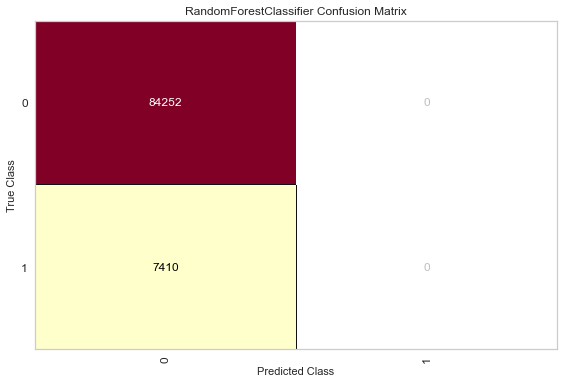

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [46]:
from yellowbrick.classifier import ConfusionMatrix
cm=ConfusionMatrix(rf_boruta)
cm.fit(X_train_selected, y_train)
cm.score(X_test_selected,y_test)
cm.show()

##### ROC CURVE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished


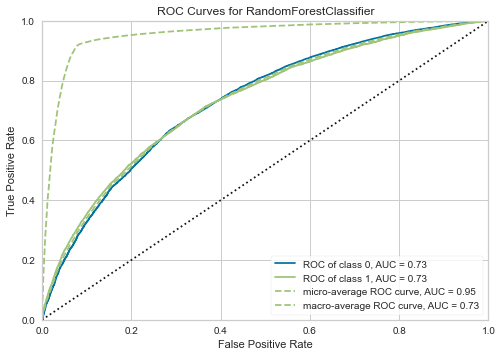

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
from yellowbrick.classifier import ROCAUC
visualizer=ROCAUC(rf_boruta)
visualizer.fit(X_train_selected, y_train)
visualizer.score(X_test_selected, y_test)
visualizer.show()

#### Precision-Recall Curves

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished


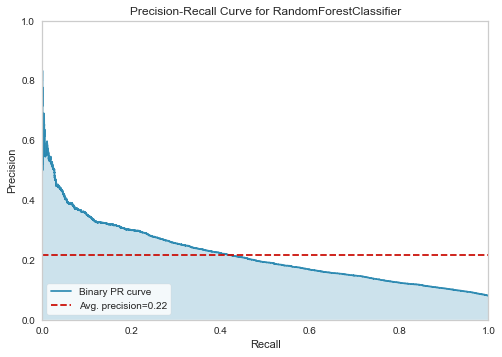

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [48]:
from yellowbrick.classifier import PrecisionRecallCurve
viz=PrecisionRecallCurve(rf_boruta)
viz.fit(X_train_selected, y_train)
viz.score(X_test_selected, y_test)
viz.show()

##### IMBALANCING CLASS CHECK

##### Check Imabalance class 

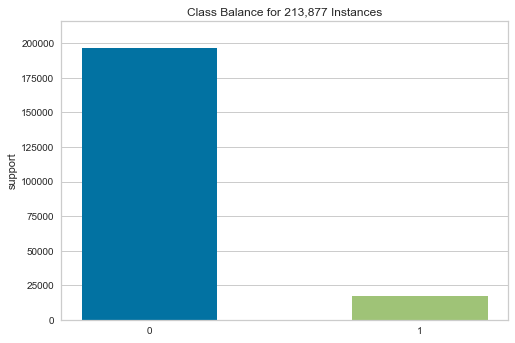

<AxesSubplot:title={'center':'Class Balance for 213,877 Instances'}, ylabel='support'>

In [49]:
from yellowbrick.target import ClassBalance

# Load the classification dataset
X_train_selected, y_train

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train)        # Fit the data to the visualizer
visualizer.show()       

#### APPLYING SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
counter=Counter(y_train)
print('Before', counter)
# oversampling the training dataset using SMOTE
smt=SMOTE()
#X_important_train, X_important_test, y_train, y_test
X_train_selected_sm, y_train_selected_sm=smt.fit_resample(X_train_selected, y_train)
counter=Counter(y_train_selected_sm)
print('After', counter)

Before Counter({0: 196586, 1: 17291})
After Counter({0: 196586, 1: 196586})


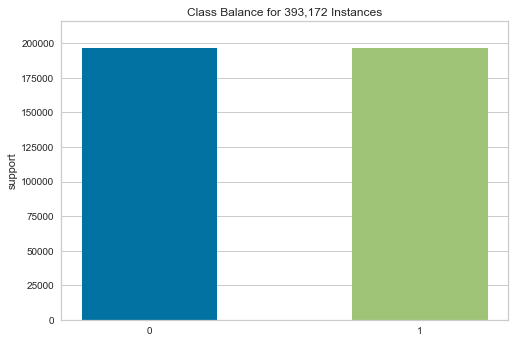

<AxesSubplot:title={'center':'Class Balance for 393,172 Instances'}, ylabel='support'>

In [51]:
from yellowbrick.target import ClassBalance

# Load the classification dataset
X_train_selected_sm, y_train_selected_sm

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train_selected_sm)        # Fit the data to the visualizer
visualizer.show() 

# Modeling selected feature + SMOTE

##### Logistique Regression

In [52]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train_selected_sm,y_train_selected_sm)

LogisticRegression()

In [53]:
y_pred_log = logre.predict(X_test_selected)

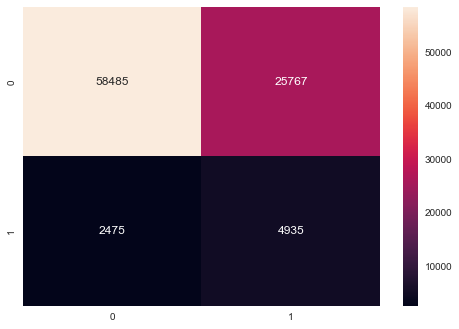

              precision    recall  f1-score   support

           0       0.96      0.69      0.81     84252
           1       0.16      0.67      0.26      7410

    accuracy                           0.69     91662
   macro avg       0.56      0.68      0.53     91662
weighted avg       0.89      0.69      0.76     91662



In [54]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_log),annot=True, fmt='d')
plt.show()
print(classification_report(y_test,y_pred_log))

Text(52.0, 0.5, 'Classe réelle')

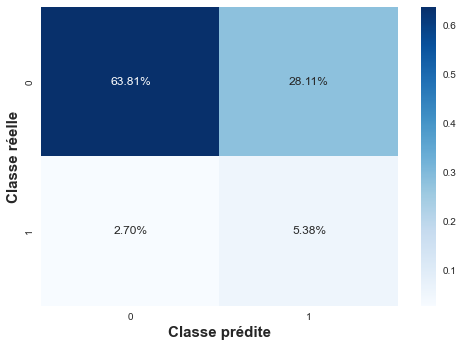

In [55]:
confu_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(confu_matrix/np.sum(confu_matrix), annot=True, cmap='Blues',
            fmt='.2%')
plt.xlabel('Classe prédite',fontsize = 15, fontweight = 'bold')
plt.ylabel('Classe réelle',fontsize = 15, fontweight = 'bold')

###### Precision recall logistique regression

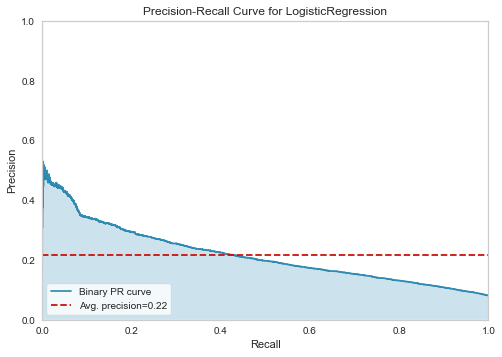

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [56]:
from yellowbrick.classifier import PrecisionRecallCurve
viz=PrecisionRecallCurve(logre)
viz.fit(X_train_selected_sm, y_train_selected_sm)
viz.score(X_test_selected, y_test)
viz.show()

##### Logistique Regression (Class_weigth='balanced')

The f1 score for the testing data: 0.2593031524057834


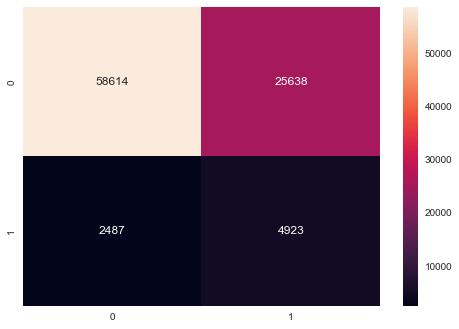

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84252
           1       0.16      0.66      0.26      7410

    accuracy                           0.69     91662
   macro avg       0.56      0.68      0.53     91662
weighted avg       0.89      0.69      0.76     91662



In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train_selected_sm, y_train_selected_sm)

# Predicting on the test data
pred_test = lr.predict(X_test_selected)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
#confusion_matrix(y_test, pred_test)
sns.heatmap(confusion_matrix(y_test,pred_test), annot=True, fmt="d")
plt.show()
print(classification_report(y_test,pred_test))

Text(52.0, 0.5, 'Classe réelle')

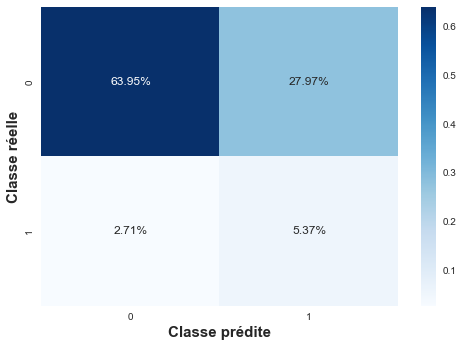

In [58]:
confu_matrix = confusion_matrix(y_test, pred_test)
sns.heatmap(confu_matrix/np.sum(confu_matrix), annot=True, cmap='Blues',
            fmt='.2%')
plt.xlabel('Classe prédite',fontsize = 15, fontweight = 'bold')
plt.ylabel('Classe réelle',fontsize = 15, fontweight = 'bold')

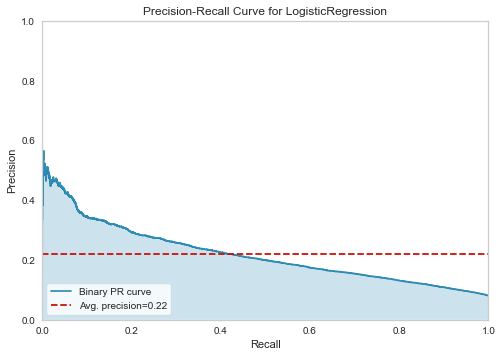

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [59]:
# Precision Recall 
from yellowbrick.classifier import PrecisionRecallCurve
viz=PrecisionRecallCurve(lr)
viz.fit(X_train_selected_sm, y_train_selected_sm)
viz.score(X_test_selected, y_test)
viz.show()

###### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation 

# Create Decision Tree classifier object
dt_clf=DecisionTreeClassifier()

# Train Decision Tree Classifier 
dt_clf.fit(X_train_selected_sm, y_train_selected_sm)

# Predict the response for test dataset
y_pred_dt=dt_clf.predict(X_test_selected)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_dt))

Accuracy : 0.81642338155397


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     84252
           1       0.12      0.20      0.15      7410

    accuracy                           0.82     91662
   macro avg       0.52      0.54      0.52     91662
weighted avg       0.86      0.82      0.84     91662



[[73338 10914]
 [ 5913  1497]]


<AxesSubplot:>

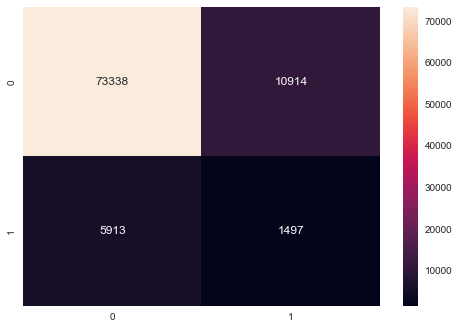

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_dt))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True, fmt="d")

###### XGBOOST Classifier

In [63]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()
# Fit
xgb_cl.fit(X_train_selected_sm, y_train_selected_sm)
# Predict
preds = xgb_cl.predict(X_test_selected)

[02:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
# Score
accuracy_score(y_test, preds)

0.9177849054133665

[[83839   413]
 [ 7123   287]]


<AxesSubplot:>

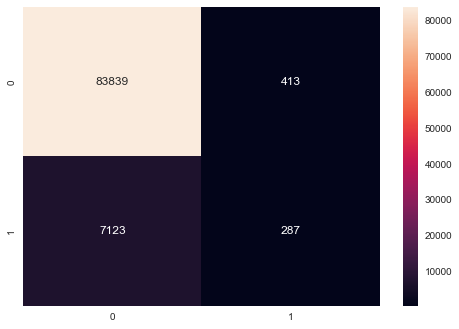

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,preds))
sns.heatmap(confusion_matrix(y_test,preds),annot=True, fmt="d")

#### Random Forest 

In [66]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5, verbose=2)
rf.fit(X_train_selected_sm, y_train_selected_sm)
# Predict
preds_rf = rf.predict(X_test_selected)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 11.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.9s finished


In [67]:
# Score
accuracy_score(y_test, preds_rf)

0.7128362898474832

[[61115 23137]
 [ 3185  4225]]


<AxesSubplot:>

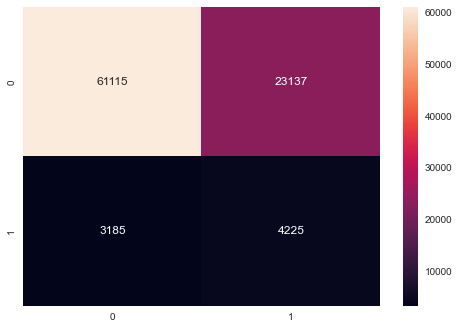

In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,preds_rf))
sns.heatmap(confusion_matrix(y_test,preds_rf),annot=True, fmt="d")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.9s finished


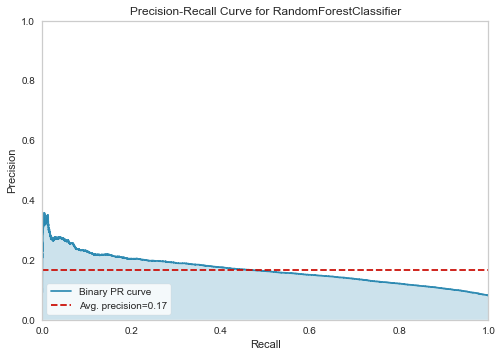

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [69]:
# Precision Recall 
from yellowbrick.classifier import PrecisionRecallCurve
viz=PrecisionRecallCurve(rf)
viz.fit(X_train_selected_sm, y_train_selected_sm)
viz.score(X_test_selected, y_test)
viz.show()

### XGBOOST + GRIDSEARCHCV

In [70]:
%%time
import xgboost as xgb
XGB_clf = xgb.XGBClassifier() 
XGB_parameters = {'max_depth': [6], 'n_estimators' : [200], 'learning_rate' : [0.05], 'gamma' : [0]}

XGB_grid = GridSearchCV(XGB_clf, XGB_parameters, cv=5, n_jobs=-1, verbose=0, scoring='roc_auc')
XGB_grid.fit(X_train_selected_sm, y_train_selected_sm)
XGB_params = XGB_grid.best_params_
XGB_model = XGB_grid.best_estimator_

[03:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 15min 6s, sys: 5.42 s, total: 15min 12s
Wall time: 10min


In [71]:
#f_betascore
XGB_grid.best_score_

0.9703511951409116

In [72]:
# Predict
preds_xgb = XGB_model.predict(X_test_selected)

In [73]:
# Score
accuracy_score(y_test, preds_xgb)

0.9160611812965024

In [74]:
# Rapport de classification
print(classification_report(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84252
           1       0.35      0.04      0.08      7410

    accuracy                           0.92     91662
   macro avg       0.64      0.52      0.52     91662
weighted avg       0.88      0.92      0.89     91662



Text(52.0, 0.5, 'Classe réelle')

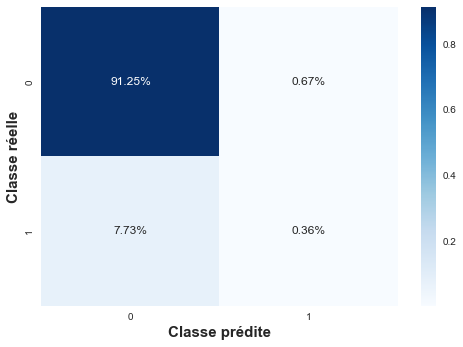

In [75]:
#cmap='Blues'
confu_matrix = confusion_matrix(y_test, preds_xgb)
sns.heatmap(confu_matrix/np.sum(confu_matrix), annot=True, cmap='Blues',
            fmt='.2%')
plt.xlabel('Classe prédite',fontsize = 15, fontweight = 'bold')
plt.ylabel('Classe réelle',fontsize = 15, fontweight = 'bold')

[03:13:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:15:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:16:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.86 1.   1.   1.   1.  ]
0.9703511951409116
0.06288602256167462


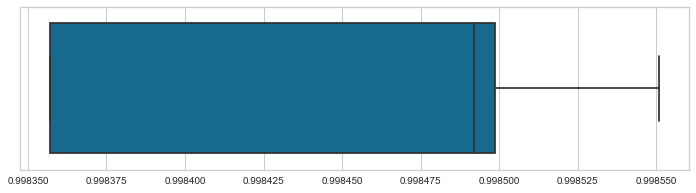

In [76]:
from sklearn.model_selection import cross_val_score
XGB = XGBClassifier(learning_rate=0.05, max_depth=6, n_estimators=200)
scores = cross_val_score(XGB, X_train_selected_sm, y_train_selected_sm, cv=5, scoring = 'roc_auc')
print(scores.round(2))
print(scores.mean())
print(scores.std(ddof=1))
plt.figure(figsize=[12,3])
sns.boxplot(scores, orient = "h", sym = "")
plt.show()

#### Nouvelle Division des données 

In [77]:
# Nouvelle division des données
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train_selected_sm, y_train_selected_sm, stratify = y_train_selected_sm, test_size = 0.3, random_state = seed)

In [78]:
# Entraînement du modèle final
Final_model = XGBClassifier(max_depth= 6, n_estimators = 200, learning_rate = 0.05)
Final_model.fit(X1_train, y1_train)

[03:21:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# Calculer le score de précision et prédire les valeurs cibles
score = Final_model.score(X1_test, y1_test)
print("Test score: {0:.2f} %".format(100 * score))
y_predict = Final_model.predict_proba(X_test_selected)[:,1]

Test score: 94.56 %


###### Helper for model evaluation

In [80]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, auc, roc_curve

def evaluation(clf, X, y):
    y_predict_proba=clf.predict_proba(X)[:,1]
    
    precision, recall, thresholds=precision_recall_curve(y, y_predict_proba)
    fpr, tpr, thresholds=roc_curve(y, y_predict_proba)
    
    
    return {
            'ROC AUC':auc(fpr, tpr), # Alternatively : roc_auc_score(y, y_predict_proba)
            'PR AUC':auc(recall, precision)
    }

###### Logistic regression model

In [81]:
evaluation(logre, X_train_selected_sm, y_train_selected_sm)

{'ROC AUC': 0.7576318151225993, 'PR AUC': 0.7360015532424045}

###### Logistique Regression (Class_weigth='balanced')

In [82]:
evaluation(lr, X_train_selected_sm, y_train_selected_sm)

{'ROC AUC': 0.7590409605694496, 'PR AUC': 0.737587649734167}

###### Decision Tree

In [83]:
evaluation(dt_clf, X_train_selected_sm, y_train_selected_sm)

{'ROC AUC': 1.0, 'PR AUC': 1.0}

##### Random Forest

In [84]:
evaluation(rf, X_train_selected_sm, y_train_selected_sm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   24.6s finished


{'ROC AUC': 0.8267740004276631, 'PR AUC': 0.8228913610904796}

###### Gradient Boosting simple

In [85]:
evaluation(xgb_cl, X_train_selected_sm, y_train_selected_sm)

{'ROC AUC': 0.9824891361209908, 'PR AUC': 0.9871548028939071}

###### Gradient Boosting + GridSearchCV

In [86]:
evaluation(XGB_model, X_train_selected_sm, y_train_selected_sm)

{'ROC AUC': 0.9770215793203072, 'PR AUC': 0.9833278793522932}

###### Final Model 

In [87]:
evaluation(Final_model, X_train_selected_sm, y_train_selected_sm)

{'ROC AUC': 0.9769533640659174, 'PR AUC': 0.9833254641852424}

## Model Explainer Dashboard 

In [98]:
from tqdm import tqdm
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(Final_model, X_test_selected, y_test)

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Note: model_output=='probability'. For XGBClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


In [99]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
Generating layout...
Calculating shap values...


100%|===================| 91600/91662 [16:50<00:00]        

Generating xgboost model dump...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating prediction probabilities...
Calculating liftcurve_dfs...
Calculating pred_percentiles...
Calculating predictions...
Calculating pr auc curves...
Calculating roc auc curves...
Calculating classification_dfs...
Calculating confusion matrices...
Calculating metrics...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.63:8050
Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app 'explainerdashboard.dashboa

 * Running on all addresses.
 * Running on http://192.168.1.63:8050/ (Press CTRL+C to quit)
192.168.1.63 - - [06/Apr/2022 19:59:55] "GET / HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 19:59:55] "GET /assets/bootstrap.min.css?m=1649193135.4394753 HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 19:59:55] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_3_1m1649192183.12.1.min.js HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 19:59:55] "GET /_dash-component-suites/dash/deps/react@16.v2_3_1m1649192183.14.0.min.js HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 19:59:55] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_3_1m1649192183.14.0.min.js HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 19:59:55] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_3_1m1649192183.7.2.min.js HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 19:59:55] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_9_1m1647104220.min.js HTTP/1.1" 200 -
192.168.1.63 - - 

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/pandas/core/indexing.py", line 1530, in _get_list_axis
    return self.obj._take_with_is_copy(key, axis=axis)
  File "/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/pandas/core/generic.py", line 3628, in _take_with_is_copy
    result = self.take(indices=indices, axis=axis)
  File "/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/pandas/core/generic.py", line 3616, in take
    indices, axis=self._get_block_manager_axis(axis), verify=True
  File "/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/pandas/core/internals/managers.py", line 862, in take
    indexer = maybe_convert_indices(indexer, n, verify=verify)
  File "/Users/admin/opt/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/pandas/core/indexers.py", line 292, in maybe_convert_in

192.168.1.63 - - [06/Apr/2022 20:01:42] "POST /_dash-update-component HTTP/1.1" 500 -
192.168.1.63 - - [06/Apr/2022 20:02:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:42:12] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.1.63 - - [06/Apr/2022 20:42:21] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.1.63 - - [06/Apr/2022 20:42:22] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.1.63 - - [06/Apr/2022 20:42:22] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.1.63 - - [06/Apr/2022 20:42:22] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.1.63 - - [06/Apr/2022 20:48:22] "GET / HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:48:22] "GET /assets/bootstrap.min.css?m=1649193135.4394753 HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:48:22] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_3_1m1649192183.12.1.min.js HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:48:22] "GET /_dash-component-suites/dash/deps/react-dom@16


                so no dtreeviz visualisation of decision trees will be shown on the shadow trees tab.

                See https://github.com/parrt/dtreeviz for info on how to properly install graphviz 
                for dtreeviz. 
                
No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:49:29] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:49:30] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:49:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:49:30] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:49:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:49:31] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:49:31] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:49:31] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:49:31] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:49:31] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:49:32] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:49:32] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:49:32] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!
No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:50:25] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:50:50] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:50:50] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:50:51] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:50:59] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


192.168.1.63 - - [06/Apr/2022 20:51:03] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:13] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:13] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:13] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:13] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:13] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:14] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:14] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:14] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.63 - - [06/Apr/2022 20:51:15] "POST /_dash-u

In [90]:
from tqdm import tqdm
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(lr, X_test_selected, y_test)

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Note: model_output=='probability'. For XGBClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


In [91]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
Generating layout...
Calculating shap values...


100%|===================| 91640/91662 [46:20<00:00]        

Generating xgboost model dump...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating prediction probabilities...
Calculating liftcurve_dfs...
Calculating pred_percentiles...
Calculating predictions...
Calculating pr auc curves...
Calculating roc auc curves...
Calculating classification_dfs...
Calculating confusion matrices...
Calculating metrics...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.63:8050
Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app 'explainerdashboard.dashboards' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.1.63:8050/ (Press CTRL+C to quit)


In [ ]:
##############################

In [92]:
import numpy as np
print(np.__version__)

1.20.3


In [ ]:
############################

In [100]:
# RandomForest
import joblib
# saving our model # model - model, filename_jlib
joblib.dump(rf, 'rf_model')

['rf_model']

In [101]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

explainer = ClassifierExplainer(rf, X_test_selected, y_test)
db = ExplainerDashboard(explainer, title="Scoring Model Explainer", shap_interaction=False)
db.to_yaml("dashboard.yaml", explainerfile="rf_model.joblib", dump_explainer=True)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurr

Calculating prediction probabilities...


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Calculating liftcurve_dfs...
Calculating pred_percentiles...
Calculating predictions...


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Calculating pr auc curves...
Calculating roc auc curves...
Calculating classification_dfs...


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.9s finished


Calculating confusion matrices...
Calculating metrics...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Dumping explainer to rf_model.joblib...


#### Model registration (Joblib)

In [96]:
# RandomForest
import joblib
# saving our model # model - model, filename_jlib
joblib.dump(Final_model, 'final_model_xgb')

['final_model_xgb']

In [94]:
# opening the file - model jolib
# m_jlib=joblib.load('model_rf')

### Deployment Model Explainer Dashboard

In [97]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

explainer = ClassifierExplainer(rf, X_test_selected, y_test)
db = ExplainerDashboard(explainer, title="Credit Scoring Model Explainer", shap_interaction=False)
db.to_yaml("dashboard_model_explainer.yaml", explainerfile="final_model_xgb.joblib", dump_explainer=True)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   10.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurr

Calculating prediction probabilities...


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Calculating liftcurve_dfs...
Calculating pred_percentiles...
Calculating predictions...


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Calculating pr auc curves...
Calculating roc auc curves...
Calculating classification_dfs...


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished


Calculating confusion matrices...
Calculating metrics...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Dumping explainer to final_model_xgb.joblib...


In [ ]:
# Sauvegarde du modèle 
import pickle
pickle.dump(rf, open("model_ref_.pkl", "wb"))

In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

explainer = ClassifierExplainer(rf, X_test_selected, y_test)
db_ = ExplainerDashboard(explainer, title="Credit Scoring Model Explainer_", shap_interaction=False)
db_.to_yaml("dashboard_model_explainer_.yaml", explainerfile="model_ref_.pkl", dump_explainer=True)

In [ ]:
# scoring-app-dashboard